# #7 beta_regression analysis

In this Jupyter Notebook, we compute the beta of stocks("MSFT" relative to "S&P500"):

1. compare & plot the beta computed daily vs. monthly
2. extend the method to get the portfolio's beta
3. compare & plot the beta for distinct sectors
4. do, compare & plot the betas in 1. and 2. above, before & after `COVID-19`
5. 

## 1. compare & plot the beta computed daily vs. monthly

first we follow & tweak the descriptions in [the blog](https://ktcf.tistory.com/47)

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

# msft vs. market rerurns - daily
msft = yf.download('MSFT', start='2010-01-01', end='2020-01-31')['Adj Close']
sp500 = yf.download('^GSPC', start='2010-01-01', end='2020-01-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
msft

Date
2010-01-04     23.572365
2010-01-05     23.579988
2010-01-06     23.435274
2010-01-07     23.191555
2010-01-08     23.351496
                 ...    
2020-01-24    159.698990
2020-01-27    157.028336
2020-01-28    160.105408
2020-01-29    162.601898
2020-01-30    167.188522
Name: Adj Close, Length: 2536, dtype: float64

In [3]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2020-01-24,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3708780000
2020-01-27,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883,3831050000
2020-01-28,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990,3531570000


In [4]:
sp500 = sp500['Adj Close']

In [5]:
df = pd.concat([msft, sp500], axis=1)
df

,Adj Close,Adj Close
Date,,
2010-01-04,23.572365,1132.989990
2010-01-05,23.579988,1136.520020
2010-01-06,23.435274,1137.140015
2010-01-07,23.191555,1141.689941
2010-01-08,23.351496,1144.979980
...,...,...
2020-01-24,159.698990,3295.469971
2020-01-27,157.028336,3243.629883
2020-01-28,160.105408,3276.239990


In [6]:
df.columns = ['MSFT', 'SP500']
df.dropna()
df

,MSFT,SP500
Date,,
2010-01-04,23.572365,1132.989990
2010-01-05,23.579988,1136.520020
2010-01-06,23.435274,1137.140015
2010-01-07,23.191555,1141.689941
2010-01-08,23.351496,1144.979980
...,...,...
2020-01-24,159.698990,3295.469971
2020-01-27,157.028336,3243.629883
2020-01-28,160.105408,3276.239990


In [7]:
ret = df.pct_change() * 100
ret.head()

,MSFT,SP500
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.032342,0.311568
2010-01-06,-0.613717,0.054552
2010-01-07,-1.039967,0.400120
2010-01-08,0.689651,0.288173


In [8]:
ret = ret.dropna()
ret.head()

,MSFT,SP500
Date,,
2010-01-05,0.032342,0.311568
2010-01-06,-0.613717,0.054552
2010-01-07,-1.039967,0.400120
2010-01-08,0.689651,0.288173
2010-01-11,-1.271993,0.174676


In [77]:
# mean (daily) return of the market
r_mean = ret['SP500'].mean()
print(r_mean)

0.0463009081140945


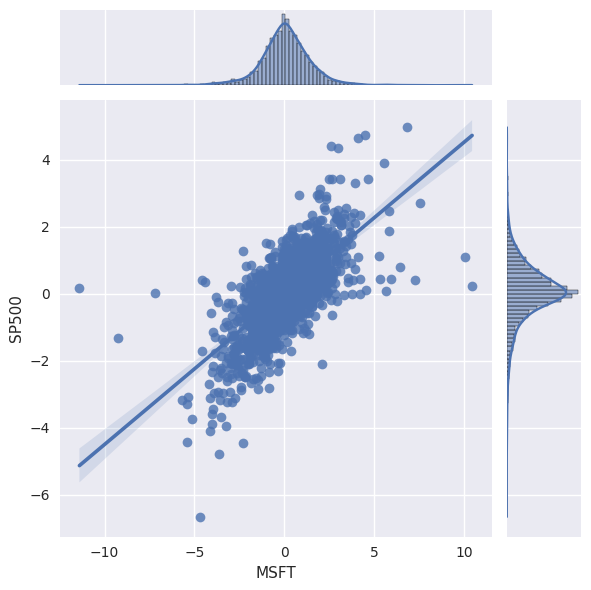

In [13]:
# visualizing the correlation btwn MSFT vs. SP500
import seaborn as sns
import matplotlib.pyplot as plt

with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='SP500', data=ret, kind='reg')
    # plt.xlabel('MSFT')
    # plt.ylabel('S&P500')
    # plt.title('Joint plot MSFT VS. SP500')
    # plt.show()

well, there seems to be some `weak` linear relationship between the two returns.

Via linear regression, we see this relationship clearly:

In [30]:
from statsmodels.formula.api import ols
model = ols("MSFT ~ SP500", data=ret).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2364.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:36:27   Log-Likelihood:                -3668.0
No. Observations:                2535   AIC:                             7340.
Df Residuals:                    2533   BIC:                             7352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0380      0.020      1.855      0.064      -0.002       0.078
SP500          1.0707      0.022     48.624      0.000       1.027       1.114
==============================================================================
Omnibus:                      605.310   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30578.035
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                      20.011   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the summary, CAPM suggests:
\begin{align*}
    r_{MSFT} &= \alpha + \beta * (r_{market} - r_f) \\
             &= 0.0380 + 1.0707 * (0.0463 - r_f)
\end{align*}

Here $r_{market} = r_{SP500}$.

p-value for beta(SP500) is almost 0 ($< 0.05$), hence is `statistically significant`.(통계적 유의성)<br>
But the p-value for $\alpha$ is 0.064, which implies this alpha value is not statistically significant.

선형회귀 결과, 위 기간동안 `MSFT`의 $\beta$=1.0707로 나타났으므로 시장지수(`S&P500`)가 1% 움직이면 `MSFT` 주가는 같은 방향 (상승 또는 하강)으로 1.0707% 움직인다.

Meanwhile R-squared(`결정계수`) value is about 0.483: so about 48.3% of the change in $r_{MSFT}$ is explained by the change of $r_{market}$.

recall the dataset covers: from '2010-01-01' to '2020-01-31'

이제 daily returns을 기준으로 alpha 와 beta 값이 이 기간동안 어떻게 변했는지 그려본다:

Text(0.5, 0.98, 'Daily alpha & beta for MSFT vs. S&P500')

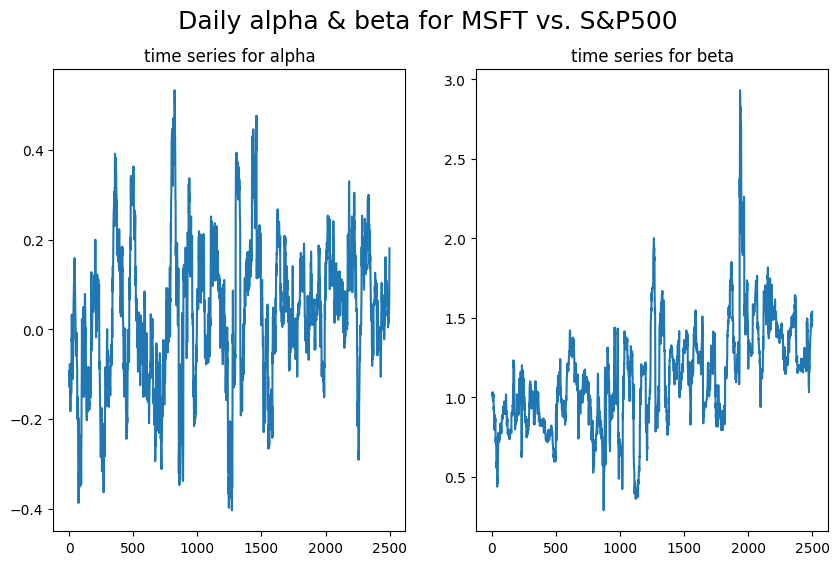

In [24]:
coef_a, coef_b = [], []
j = 36
while j <= len(ret):
    data_36 = ret.iloc[j-36:j, :]
    coefs = ols('MSFT ~ SP500', data=data_36).fit().params
    coef_a.append(coefs[0])
    coef_b.append(coefs[1])
    j += 1

fix, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(coef_a)
ax[0].set_title('time series for alpha')
ax[1].plot(coef_b)
ax[1].set_title('time series for beta')
plt.suptitle("Daily alpha & beta for MSFT vs. S&P500", fontsize=18)

Text(0.5, 0.98, 'Daily alpha & beta for MSFT vs. S&P500')

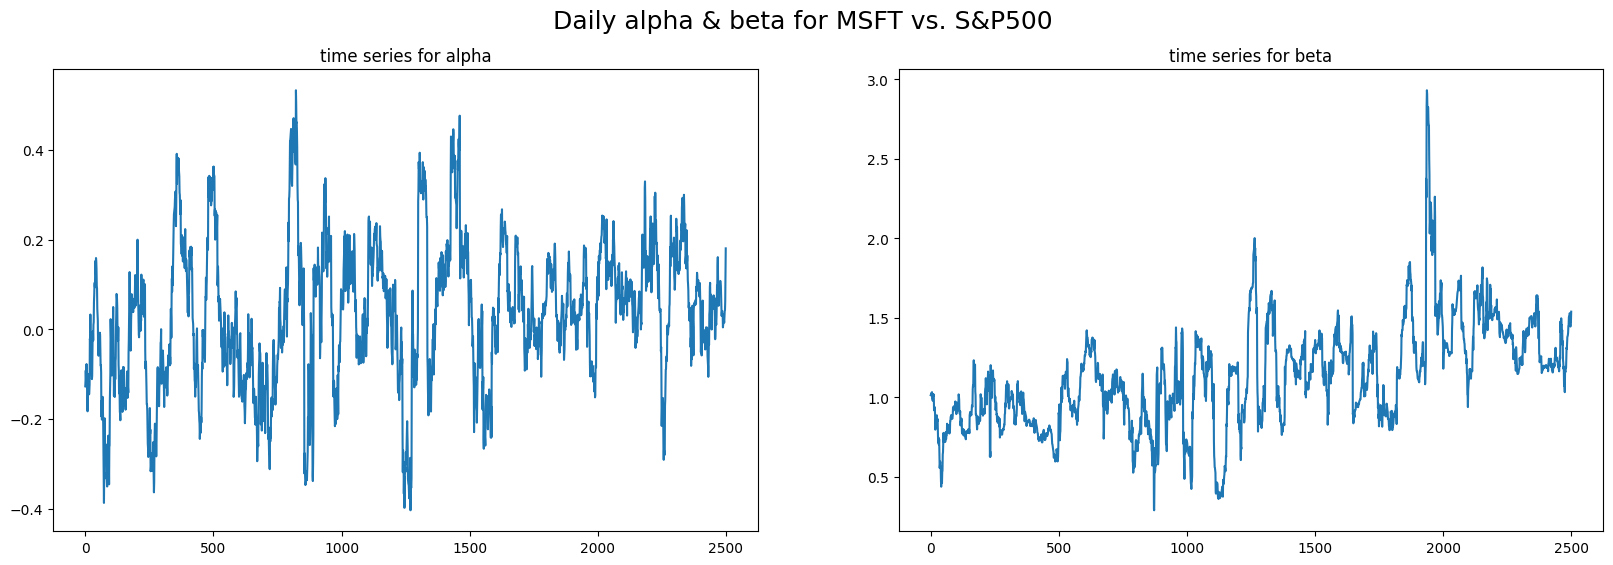

In [26]:
fix, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(coef_a)
ax[0].set_title('time series for alpha')
ax[1].plot(coef_b)
ax[1].set_title('time series for beta')
plt.suptitle("Daily alpha & beta for MSFT vs. S&P500", fontsize=18)

Text(0.5, 0.98, 'Daily alpha & beta for MSFT vs. S&P500')

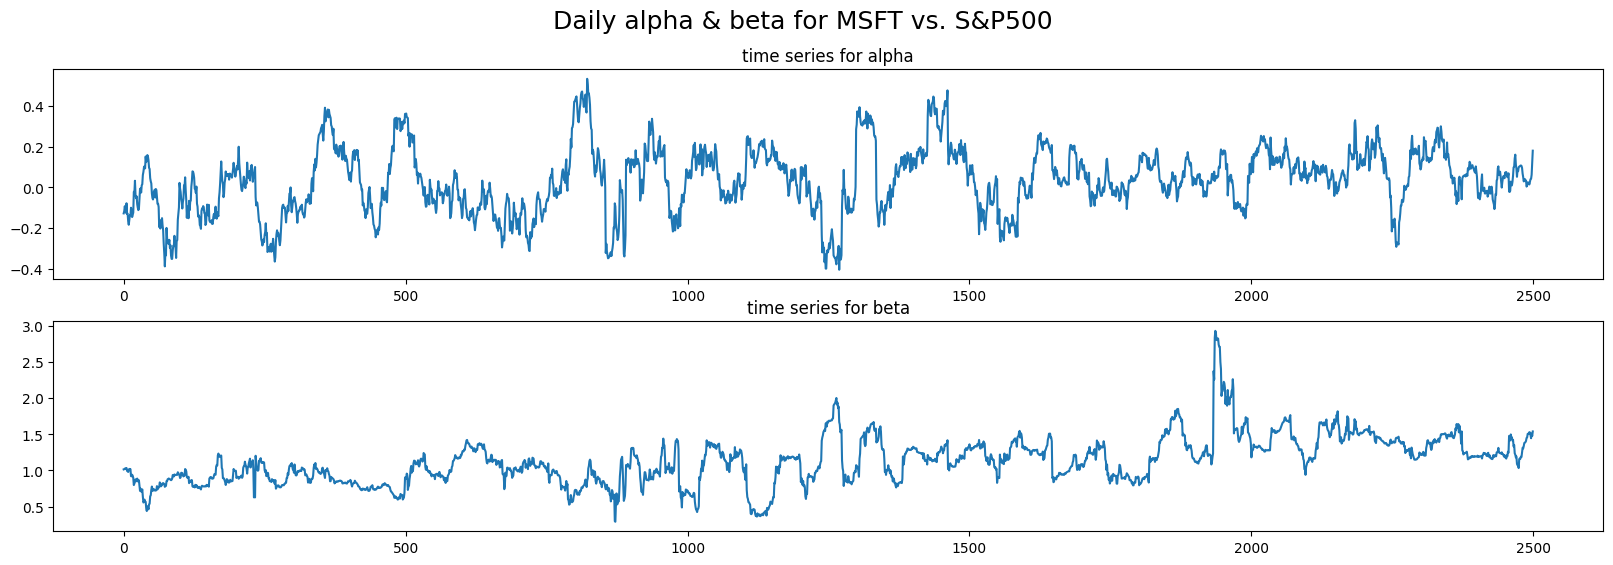

In [29]:
fix, ax = plt.subplots(2, 1, figsize=(20, 6))
ax[0].plot(coef_a)
ax[0].set_title('time series for alpha')
ax[1].plot(coef_b)
ax[1].set_title('time series for beta')
plt.suptitle("Daily alpha & beta for MSFT vs. S&P500", fontsize=18)

daily returns 데이터는 변동폭이 너무 크기에

일간 데이터보다는 월간 데이터로부터 회귀분석하여 도출된 alpha와 beta를 더 신뢰할 수 있다.

물론 daily가 monthly보다는 약 30배 데이터가 더 많기는 하지만 절대적인 데이터의 수가 충분히 크기 때문에 통계학적으로 문제는 없다.

In [32]:
# monthly returns
msft_m = yf.download('MSFT', start='2010-01-01', end='2020-01-31', interval='1mo')['Adj Close']
sp500_m = yf.download('^GSPC', start='2010-01-01', end='2020-01-31', interval='1mo')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
df_m = pd.concat([msft_m, sp500_m], axis=1)
df_m.head()

,Adj Close,Adj Close
Date,,
2010-01-01,21.462656,1073.869995
2010-02-01,21.835855,1104.489990
2010-03-01,22.412382,1169.430054
2010-04-01,23.368864,1186.689941
2010-05-01,19.741875,1089.410034


In [34]:
df_m.columns = ['MSFT', 'SP500']
df_m.dropna()
df_m

,MSFT,SP500
Date,,
2010-01-01,21.462656,1073.869995
2010-02-01,21.835855,1104.489990
2010-03-01,22.412382,1169.430054
2010-04-01,23.368864,1186.689941
2010-05-01,19.741875,1089.410034
...,...,...
2019-09-01,134.074509,2976.739990
2019-10-01,138.259857,3037.560059
2019-11-01,145.984329,3140.979980


In [35]:
ret_m = df_m.pct_change() * 100
ret_m.head()

,MSFT,SP500
Date,,
2010-01-01,NaN,NaN
2010-02-01,1.738832,2.851369
2010-03-01,2.640275,5.879643
2010-04-01,4.267650,1.475923
2010-05-01,-15.520606,-8.197584


In [36]:
ret_m = ret_m.dropna()
ret_m.head()

,MSFT,SP500
Date,,
2010-02-01,1.738832,2.851369
2010-03-01,2.640275,5.879643
2010-04-01,4.267650,1.475923
2010-05-01,-15.520606,-8.197584
2010-06-01,-10.411531,-5.388244


In [37]:
# mean (monthly) return of the market
rm_m = ret_m['SP500'].mean()
print(rm_m)

0.9840626707151651


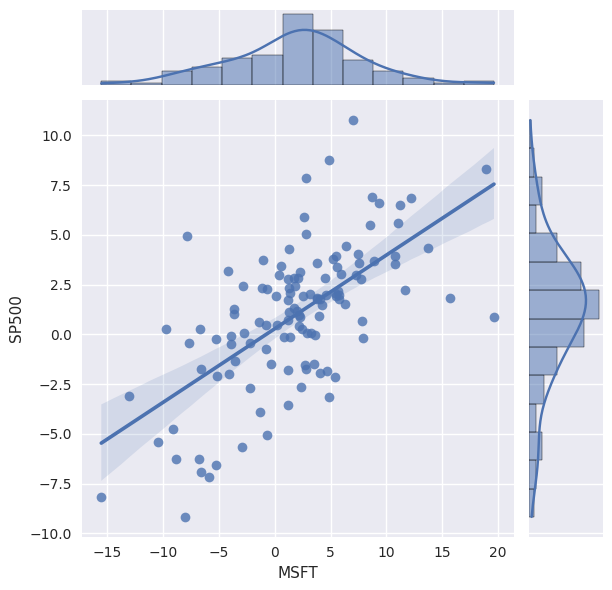

In [38]:
with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='SP500', data=ret_m, kind='reg')   

In [39]:
from statsmodels.formula.api import ols
model = ols("MSFT ~ SP500", data=ret_m).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     77.87
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.19e-14
Time:                        11:42:19   Log-Likelihood:                -355.96
No. Observations:                 120   AIC:                             715.9
Df Residuals:                     118   BIC:                             721.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8377      0.449      1.866      0.064      -0.051       1.727
SP500          1.0731      0.122      8.824      0.000       0.832       1.314
==============================================================================
Omnibus:                        7.311   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               11.406
Skew:                           0.219   Prob(JB):                      0.00334
Kurtosis:                       4.446   Cond. No.                         3.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
0.8377 / 0.0380

22.044736842105262

In [53]:
5.4772 * 0.0380, 5.4772 * 1.0707

(0.2081336, 5.86443804)

즉, MSFT와 ^GSPC의 월간 수익률로부터 선형회귀를 진행하면 $\alpha_m = 0.8377, \beta_m=1.0731$로 나타났고

이를 식으로 나타내면

\begin{align*}
    r_{MSFT,m} &= \alpha_m + \beta_m * (r_{market,m} - r_{f,m}) \\
             &= 0.8377 + 1.0731 * (0.9841 - r_f)
\end{align*}
이 됨을 알 수 있다.

참고로 위 daily returns에서 구한 $\alpha=0.0380, \beta=1.0707$ 값과 비교해보면
$\beta$ 값은 큰 차이가 없으나 $\alpha$ 값은 대략 22.0447배나 차이가 남을 알 수 있다.

참고로 위 daily returns에서 구한 $\alpha=0.0380, \beta=1.0707$ 값에 $\sqrt{30} \approx 5.4772$를 곱해주면:
$$
    \alpha * 0.0380 \approx 0.2081, \beta * 1.0707 \approx 5.8644
$$ 이다. <- 어떻게 해석해야할까?


p-value for beta(SP500) is almost 0 ($< 0.05$), hence is `statistically significant`.(통계적 유의성)<br>
But the p-value for $\alpha$ is 0.064, which implies this alpha value is not statistically significant.

Meanwhile R-squared(`결정계수`) value is about 0.398: so about 39.8% of the change in $r_{MSFT, m}$ is explained by the change of $r_{market, m}$.
여기서 subscript m은 `monthly`를 나타낸다.

recall the dataset covers: from '2010-01-01' to '2020-01-31'

이제 `monthly` returns을 기준으로 alpha 와 beta 값이 이 기간동안 어떻게 변했는지 그려본다:

Text(0.5, 0.98, 'Monthly alpha & beta for MSFT vs. S&P500')

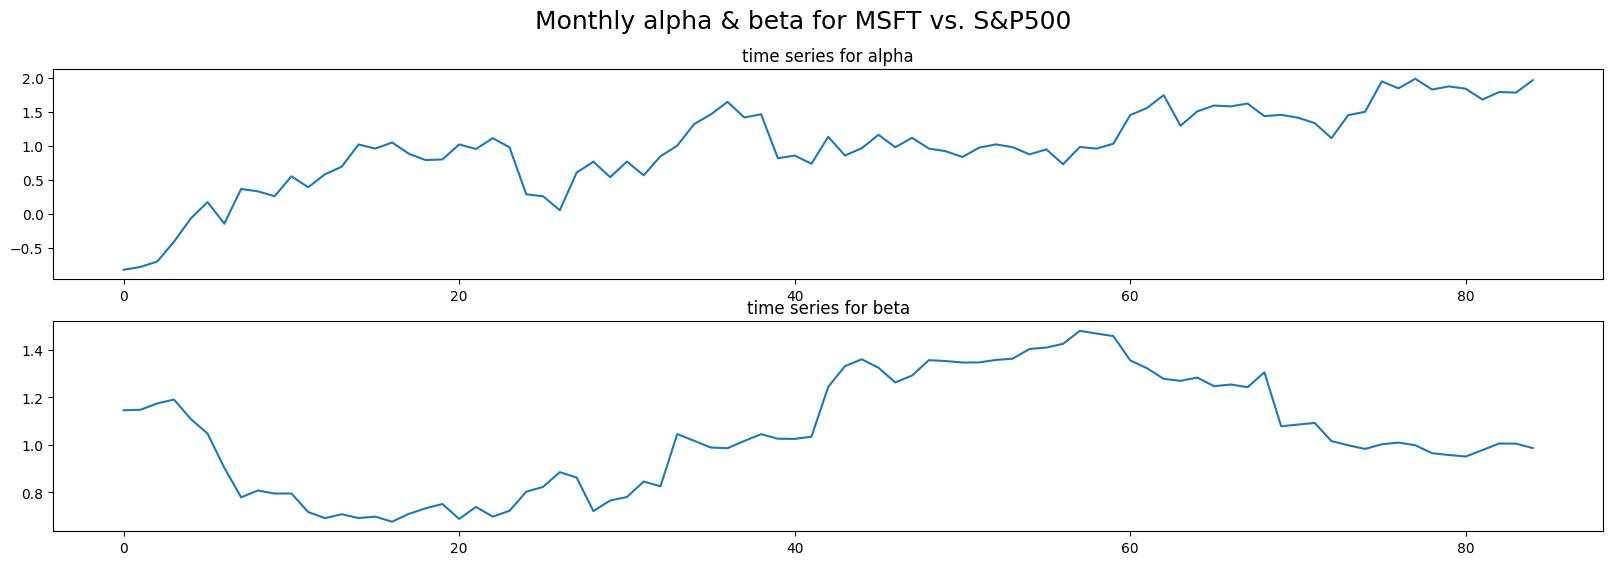

In [41]:
# monthly alpha & beta
coef_m_a, coef_m_b = [], []
j = 36
while j <= len(ret_m):
    data_36m = ret_m.iloc[j-36:j, :]
    coefs_m = ols('MSFT ~ SP500', data=data_36m).fit().params
    coef_m_a.append(coefs_m[0])
    coef_m_b.append(coefs_m[1])
    j += 1

fix, ax = plt.subplots(2, 1, figsize=(20, 6))
ax[0].plot(coef_m_a)
ax[0].set_title('time series for alpha')
ax[1].plot(coef_m_b)
ax[1].set_title('time series for beta')
plt.suptitle("Monthly alpha & beta for MSFT vs. S&P500", fontsize=18)

Text(0.5, 0.98, 'Daily & Monthly beta for MSFT vs. S&P500')

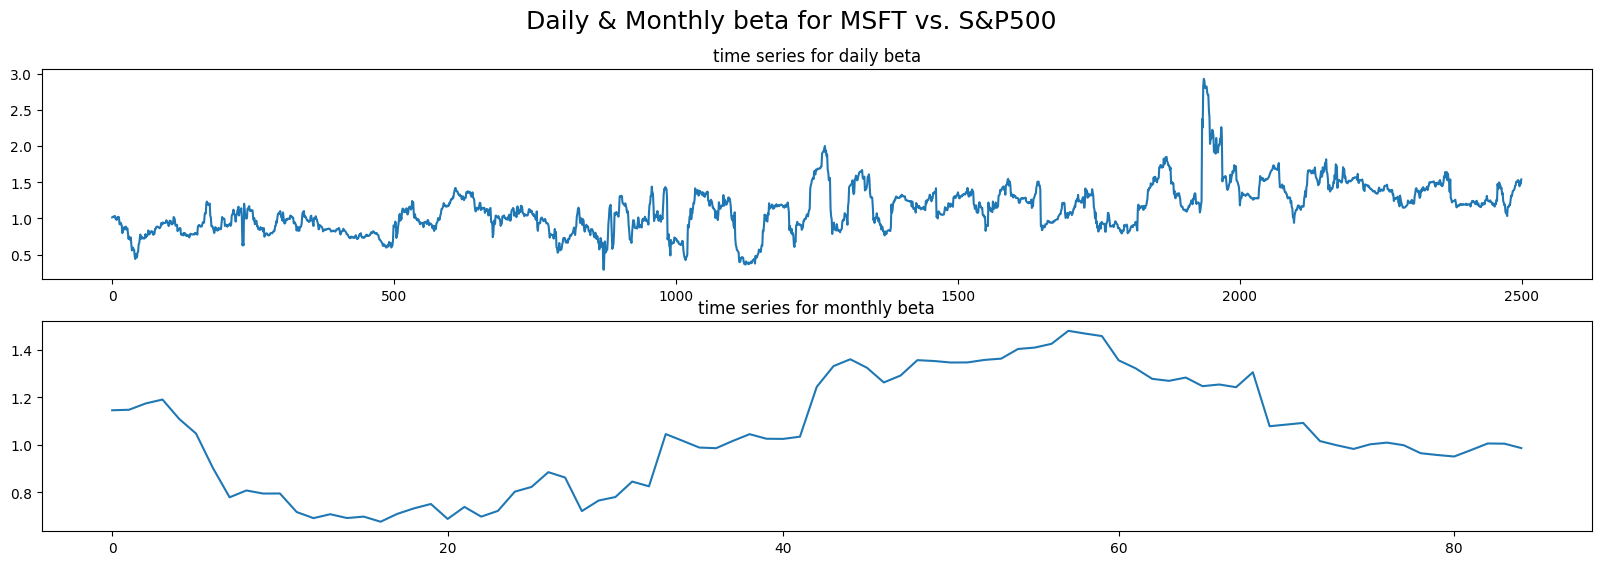

In [43]:
fix, ax = plt.subplots(2, 1, figsize=(20, 6))
ax[0].plot(coef_b)
ax[0].set_title('time series for daily beta')
ax[1].plot(coef_m_b)
ax[1].set_title('time series for monthly beta')
plt.suptitle("Daily & Monthly beta for MSFT vs. S&P500", fontsize=18)

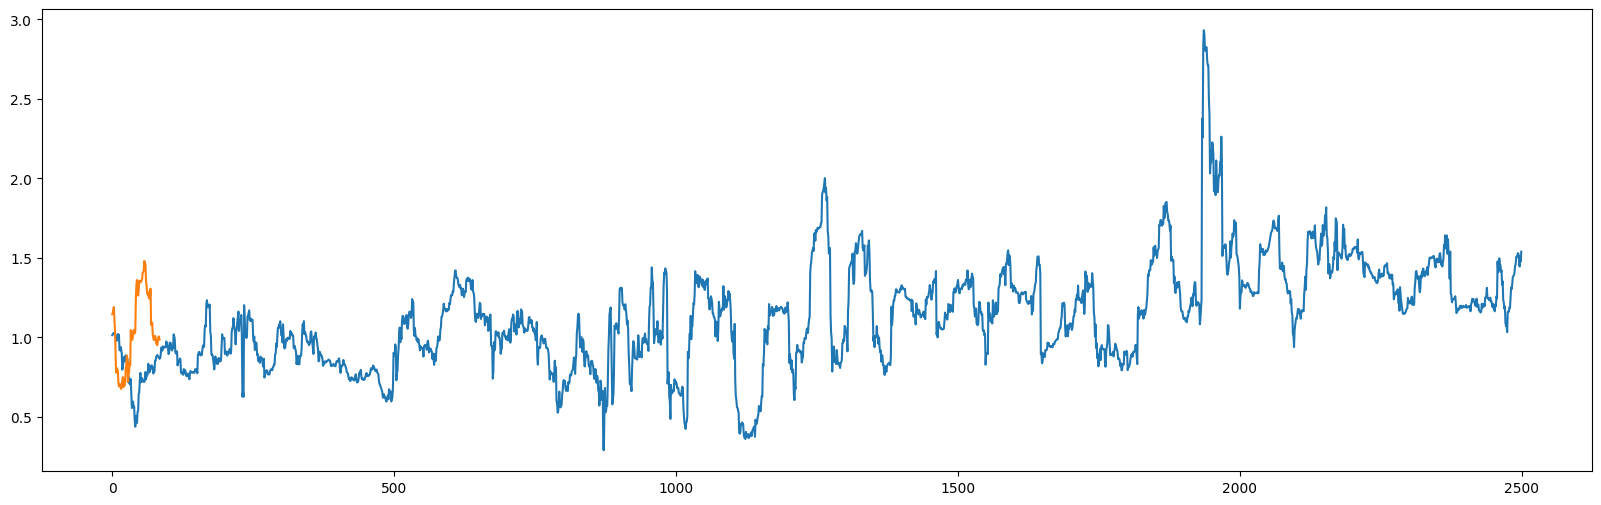

In [45]:
# well, this is meaningless
plt.figure(figsize=(20, 6))
plt.plot(coef_b)
plt.plot(coef_m_b)

In [51]:
# note that they have different sizes
len(coef_b), len(coef_m_b)

(2500, 85)

### *digression*

In [ ]:
'''
위 코드에서는 
from statsmodels.formula.api import ols
model = ols("MSFT ~ SP500", data=ret_m).fit()
model.summary()
를 사용했지만 아래 두 셀처럼 다른 방법도 있다:
'''

In [102]:
import statsmodels.api as sm
model2 = sm.formula.ols(formula="MSFT ~ SP500", data=ret).fit()
print(model2.params)

Intercept    0.037954
SP500        1.070676
dtype: float64


In [103]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2364.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:05:20   Log-Likelihood:                -3668.0
No. Observations:                2535   AIC:                             7340.
Df Residuals:                    2533   BIC:                             7352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0380      0.020      1.855      0.064      -0.002       0.078
SP500          1.0707      0.022     48.624      0.000       1.027       1.114
==============================================================================
Omnibus:                      605.310   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30578.035
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                      20.011   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# import statsmodels.api as sm
model3 = sm.OLS(ret['MSFT'], sm.add_constant(ret['SP500'])).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2364.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:04:56   Log-Likelihood:                -3668.0
No. Observations:                2535   AIC:                             7340.
Df Residuals:                    2533   BIC:                             7352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0380      0.020      1.855      0.064      -0.002       0.078
SP500          1.0707      0.022     48.624      0.000       1.027       1.114
==============================================================================
Omnibus:                      605.310   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30578.035
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                      20.011   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
print(model3.params)

const    0.037954
SP500    1.070676
dtype: float64


물론 아래처럼 위 코드들을 결합시킬 수도 있다:

[*********************100%***********************]  2 of 2 completed


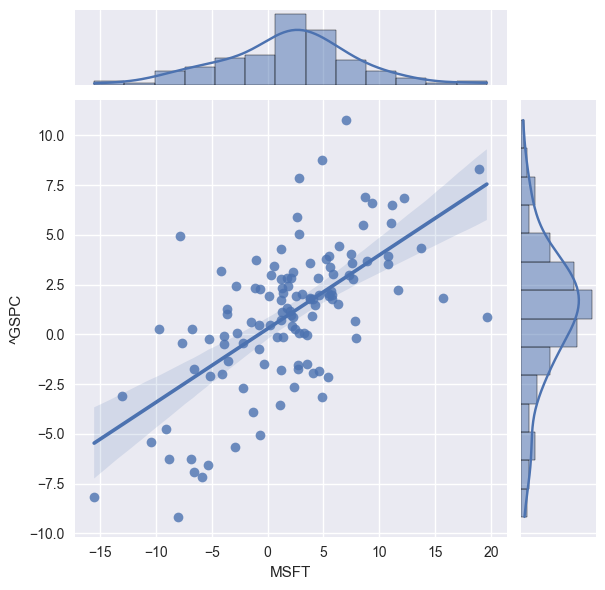

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     77.87
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.19e-14
Time:                        08:27:46   Log-Likelihood:                -355.96
No. Observations:                 120   AIC:                             715.9
Df Residuals:                     118   BIC:                             721.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8377      0.449      1.866      0.0

In [115]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 다운로드 및 가공
start_date = '2010-01-01'
end_date = '2020-01-31'
df = yf.download(['MSFT', '^GSPC'], start=start_date, end=end_date, interval='1mo')['Adj Close']
ret = df.pct_change() * 100
ret = ret.dropna()

# Jointplot으로 두 변수 간의 관계 시각화
with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='^GSPC', data=ret, kind='reg')
    plt.xlabel('MSFT')
    plt.ylabel('^GSPC')
    # plt.title('Scatter plot of MSFT and ^GSPC')
    plt.show()

# CAPM 모델을 위한 선형 회귀
X = sm.add_constant(ret['^GSPC'])  # 상수항을 추가한 설명 변수 X: array에 1만으로 구성된 상수항 column을 추가
y = ret['MSFT']  # 종속 변수 y

model = sm.OLS(y, X)  # OLS 모델 생성
results = model.fit()  # 모델 피팅

# 회귀 결과 출력
print(results.summary())

위 코드에서 X, y 는 아래와 같다:

In [113]:
X

,const,^GSPC
Date,,
2010-02-01,1.0,2.851369
2010-03-01,1.0,5.879643
2010-04-01,1.0,1.475923
2010-05-01,1.0,-8.197584
2010-06-01,1.0,-5.388244
...,...,...
2019-09-01,1.0,1.718118
2019-10-01,1.0,2.043177
2019-11-01,1.0,3.404704


In [114]:
y

Date
2010-02-01     1.738787
2010-03-01     2.640284
2010-04-01     4.267684
2010-05-01   -15.520642
2010-06-01   -10.411474
                ...    
2019-09-01     1.184486
2019-10-01     3.121647
2019-11-01     5.586935
2019-12-01     4.529410
2020-01-01     7.945459
Name: MSFT, Length: 120, dtype: float64

[*********************100%***********************]  2 of 2 completed


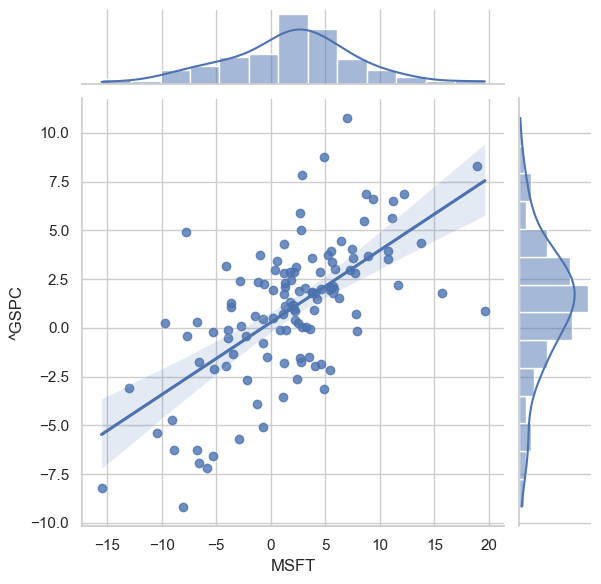

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     77.87
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.19e-14
Time:                        08:30:23   Log-Likelihood:                -355.96
No. Observations:                 120   AIC:                             715.9
Df Residuals:                     118   BIC:                             721.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8377      0.449      1.866      0.0

In [116]:
# 위 통합 코드에서 jointplot 파트만 살짝 바꾼 코드: 결과는 똑같다
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 다운로드
start_date = '2010-01-01'
end_date = '2020-01-31'
df = yf.download(['MSFT', '^GSPC'], start=start_date, end=end_date, interval='1mo')['Adj Close']
ret = df.pct_change() * 100
ret = ret.dropna()

# Jointplot으로 두 변수 간의 관계 시각화
sns.set(style='whitegrid')  # 스타일 설정
sns.jointplot(x='MSFT', y='^GSPC', data=ret, kind='reg')
plt.xlabel('MSFT')
plt.ylabel('^GSPC')
# plt.title('MSFT와 ^GSPC의 산점도')
plt.show()

# CAPM 모델을 위한 선형 회귀
X = sm.add_constant(ret['^GSPC'])  # 상수항을 추가한 설명 변수 X
y = ret['MSFT']  # 종속 변수 y

model = sm.OLS(y, X)  # OLS 모델 생성
results = model.fit()  # 모델 피팅

# 회귀 결과 출력
print(results.summary())

여기까지 확인 완료

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression

# symbols = [stock, market]
# start date for historical prices
symbols = ['AXP', 'SPY']
data = yf.download(symbols, '2020-2-22')['Adj Close']

# Convert historical stock prices to daily percent change
price_change = data.pct_change()

# Deletes row one containing the NaN
df = price_change.drop(price_change.index[0])

# Create arrays for x and y variables in the regression model
# Set up the model and define the type of regression
x = np.array(df['AXP']).reshape((-1,1))
y = np.array(df['SPY'])
model = LinearRegression().fit(x, y)

print('Beta = ', model.coef_)

In [ ]:
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression

tickers = ['AAPL', 'MSFT', 'NVDA', 'AMD', '^GSPC']
data = yf.download(tickers, start='2015-12-01', end='2021-01-01', interval='1mo')['Adj Close']
# pxclose = yf.download(ticker, start='1980-01-01', end='2019-06-30', interval='1m')['Adj Close']
log_returns = np.log(data / data.shift())

data.head()

In [ ]:
log_returns = log_returns.dropna()
log_returns.head()

In [ ]:
cov = log_returns.cov()
var = log_returns['^GSPC'].var()

cov

In [ ]:
var

In [ ]:
# definition of beta of 'AAPL'
cov.loc['AAPL', '^GSPC'] / var

In [ ]:
x = log_returns['^GSPC'].iloc[1:].to_numpy().reshape(-1, 1)
y = log_returns['AAPL'].iloc[1:].to_numpy().reshape(-1, 1)

lin_regr = LinearRegression()
lin_regr.fit(x, y)

lin_regr,coef_[0,0]

## 2. extend the method to get the portfolio's beta

Here we follow: [this link](https://www.codingfinance.com/post/2018-04-25-portfolio-beta-py/)

이번 절에서는 여러 개의 자산으로 구성된 포트폴리오의 베타를 구해본다.

다만 임의로 포트폴리오를 구성했는데, S&P500 를 구성하는 시가총액 기준 Top 5 stocks에 대해 비중 (`weight`)은 임의로 설정했다:

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Top 5 stocks according to Yahoo finance: Equity screener - Mega Cap - Market Cap (sorted in descending order)
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA']
weight = [0.1, 0.2, 0.25, 0.25, 0.2]

# portfolio data
df_top5 = yf.download(tickers, start='2010-01-01', end='2020-01-31', interval='1mo')['Adj Close']

r_top5 = df_top5.pct_change()[1:]
r_top5.head()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,NVDA
Date,,,,,
2010-02-01,0.065396,-0.055897,-0.005925,0.017388,0.052632
2010-03-01,0.148470,0.146706,0.076538,0.026403,0.074074
2010-04-01,0.111022,0.009796,-0.073036,0.042677,-0.097127
2010-05-01,-0.016125,-0.084902,-0.076222,-0.155207,-0.163590
2010-06-01,-0.020827,-0.129125,-0.083768,-0.104115,-0.222983


In [60]:
# portfolio returns
r_p = (r_top5 * weight).sum(axis=1)
r_p.head()

Date
2010-02-01    0.008752
2010-03-01    0.084738
2010-04-01   -0.013954
2010-05-01   -0.109168
2010-06-01   -0.119475
dtype: float64

In [62]:
# benchmark data
df_bm = yf.download('SPY', start='2010-01-01', end='2020-01-31', interval='1mo')['Adj Close']
df_bm.head()

[*********************100%***********************]  1 of 1 completed


Date
2010-01-01    83.190315
2010-02-01    85.785408
2010-03-01    90.634766
2010-04-01    92.415886
2010-05-01    85.073036
Name: Adj Close, dtype: float64

In [63]:
r_bm = df_bm.pct_change()[1:]
r_bm.head()

Date
2010-02-01    0.031195
2010-03-01    0.056529
2010-04-01    0.019652
2010-05-01   -0.079454
2010-06-01   -0.056231
Name: Adj Close, dtype: float64

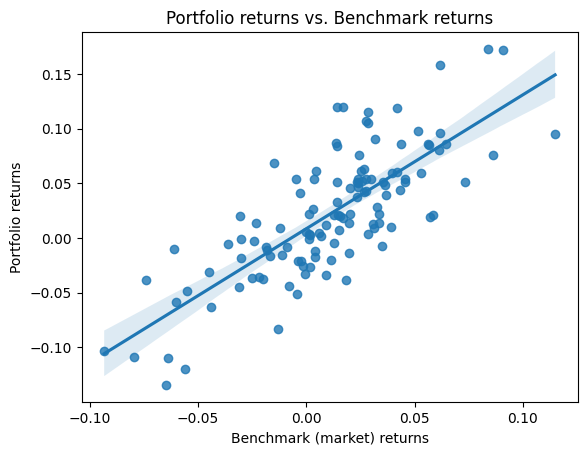

In [72]:
# scatter plot of portfolio vs. benchmark
sns.regplot(x=r_bm.values, y=r_p.values)
plt.xlabel("Benchmark (market) returns")
plt.ylabel("Portfolio returns")
plt.title("Portfolio returns vs. Benchmark returns")
plt.show()

In [75]:
beta, alpha = stats.linregress(r_p.values, r_bm.values)[0:2]
print("Portfolio beta is", round(beta, 4))
print("Portfolio alpha is", round(alpha, 4))

Portfolio beta is 0.4919
Portfolio alpha is 0.0004


각 종목 간의 상관관계를 가늠해보기위해 Correlation matrix를 계산한다:

In [88]:
corr_top5 = r_top5.corr()

print("Correlation Matrix:")
print(corr_top5)

Correlation Matrix:
          AAPL      AMZN      GOOG      MSFT      NVDA
AAPL  1.000000  0.345242  0.350641  0.399257  0.404613
AMZN  0.345242  1.000000  0.484927  0.414953  0.320249
GOOG  0.350641  0.484927  1.000000  0.487001  0.300340
MSFT  0.399257  0.414953  0.487001  1.000000  0.384636
NVDA  0.404613  0.320249  0.300340  0.384636  1.000000


`corr_top5`의 upper part만 보면 대략 주식간의 상관계수가 0.30 ~ 0.49 사이에 분포함을 알 수 있다.

In [81]:
cov_top5 = r_top5.cov()
cov_portfolio = np.dot(np.dot(weight, cov_top5), np.array(weight).T)

print("Portfolio Covariance:", cov_portfolio)

Portfolio Covariance: 0.0033027201252268917


In [ ]:
cov_p = r_p.cov() * 12
cov_bm = r_bm.cov() * 12

print("Portfolio beta using its definition is", cov_p_bm/var_bm)

In [ ]:
def plot_beta(r, ):

# monthly alpha & beta
coef_m_a, coef_m_b = [], []
j = 36
while j <= len(ret_m):
    data_36m = ret_m.iloc[j-36:j, :]
    coefs_m = ols('MSFT ~ SP500', data=data_36m).fit().params
    coef_m_a.append(coefs_m[0])
    coef_m_b.append(coefs_m[1])
    j += 1

fix, ax = plt.subplots(2, 1, figsize=(20, 6))
ax[0].plot(coef_m_a)
ax[0].set_title('time series for alpha')
ax[1].plot(coef_m_b)
ax[1].set_title('time series for beta')
plt.suptitle("Monthly alpha & beta for MSFT vs. S&P500", fontsize=18)

포트폴리오의 각 자산의 beta 값을 plot해보자:

[*********************100%***********************]  6 of 6 completed


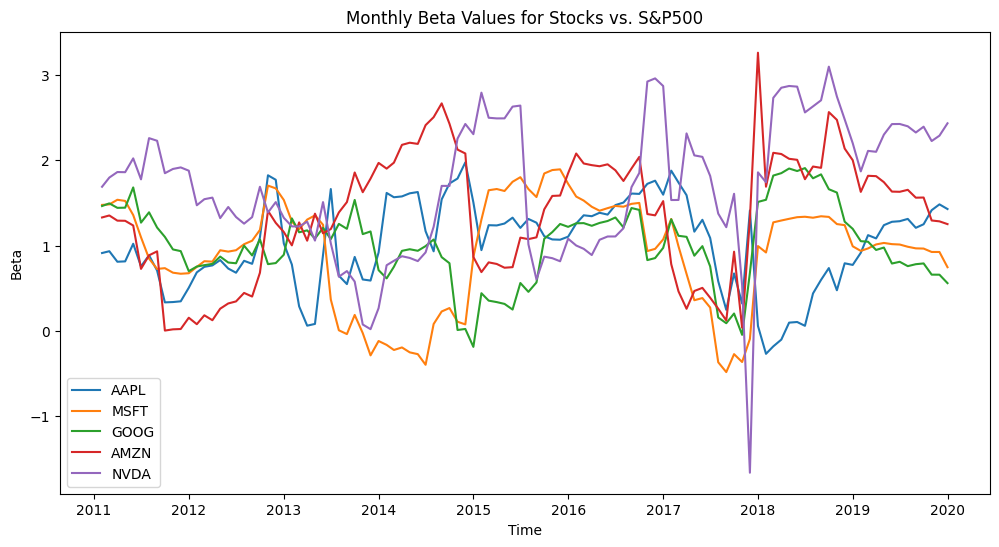

In [90]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Ticker symbols
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA']
benchmark = '^GSPC'  # S&P500

# Downloading stock and benchmark data
data = yf.download(tickers + [benchmark], start='2010-01-01', end='2020-01-31', interval='1mo')['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Splitting stock and benchmark returns
stock_returns = returns[tickers]
benchmark_returns = returns[benchmark]

# Initialize empty DataFrame for beta values
beta_values = pd.DataFrame(index=stock_returns.index, columns=tickers)

# Calculate beta values
for date in stock_returns.index:
    if date >= stock_returns.index[0] + pd.DateOffset(months=12):
        # Select the past 12 months of data for beta calculation
        past_returns = stock_returns.loc[date - pd.DateOffset(months=12):date]
        beta_values.loc[date] = [stats.linregress(benchmark_returns.loc[date - pd.DateOffset(months=12):date], past_returns[ticker])[0]
                                 for ticker in tickers]

# Plotting beta values
fig, ax = plt.subplots(figsize=(12, 6))
for ticker in tickers:
    ax.plot(beta_values.index, beta_values[ticker], label=ticker)

ax.set_xlabel('Time')
ax.set_ylabel('Beta')
ax.set_title('Monthly Beta Values for Stocks vs. S&P500')
ax.legend()
plt.show()

beta 값들을 계산할 때 위처럼 12 개월 간격이 아닌 30 개월 간격으로 바꾸면 결과값이 달라진다:

[*********************100%***********************]  6 of 6 completed


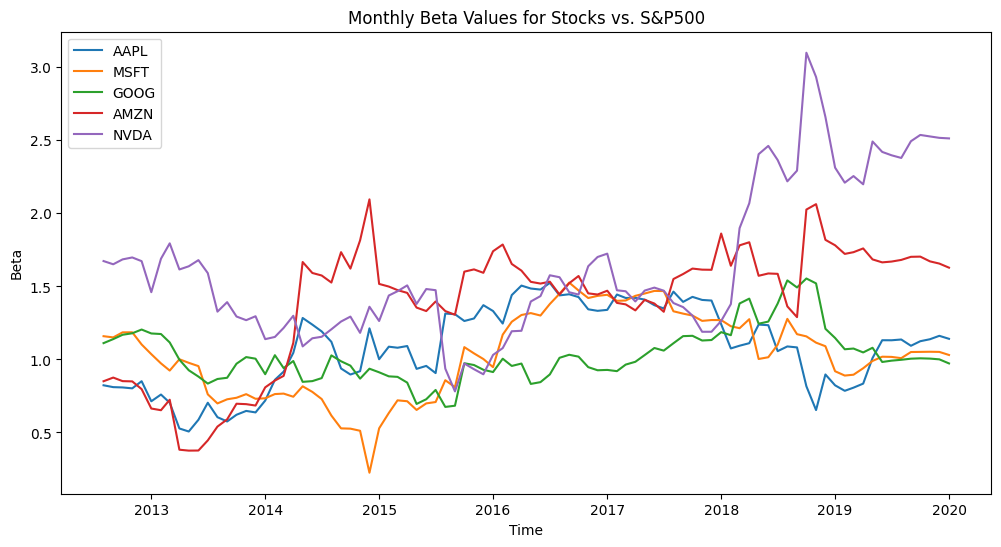

In [96]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Ticker symbols
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA']
benchmark = '^GSPC'  # S&P500

# Downloading stock and benchmark data
data = yf.download(tickers + [benchmark], start='2010-01-01', end='2020-01-31', interval='1mo')['Adj Close']

# Calculate returns
returns = data.pct_change().dropna()

# Splitting stock and benchmark returns
stock_returns = returns[tickers]
benchmark_returns = returns[benchmark]

# Initialize empty DataFrame for beta values
beta_values = pd.DataFrame(index=stock_returns.index, columns=tickers)

# Calculate beta values
for date in stock_returns.index:
    if date >= stock_returns.index[0] + pd.DateOffset(months=30):
        # Select the past 30 months of data for beta calculation
        past_returns = stock_returns.loc[date - pd.DateOffset(months=30):date]
        beta_values.loc[date] = [stats.linregress(benchmark_returns.loc[date - pd.DateOffset(months=30):date], past_returns[ticker])[0]
                                 for ticker in tickers]

# Plotting beta values
fig, ax = plt.subplots(figsize=(12, 6))
for ticker in tickers:
    ax.plot(beta_values.index, beta_values[ticker], label=ticker)

ax.set_xlabel('Time')
ax.set_ylabel('Beta')
ax.set_title('Monthly Beta Values for Stocks vs. S&P500')
ax.legend()
plt.show()

## 3. compare & plot the beta for distinct sectors